- 목표 : lgbm 모델에서 최적의 target_sr찾기

In [1]:
import numpy as np
import pandas as pd
import glob
import os
os.getcwd()
os.chdir('/project/time_series')
from load_data import load_data_using_multi_process
from make_roc_curve import make_roc_curve
from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split
from model import model_lgbm

# fan

In [3]:
fan_path = '/data/time_series/fan/0'
len_fan_path = len(glob.glob( fan_path + '/*/*/*' ))
print(f'fan file개수 : { len_fan_path }개.')
fan_files = glob.glob(fan_path + '/*/*/*')


fan file개수 : 5550개.


## kaiser_best

In [17]:
for i in range(1, 1+16000):
    if 16000 % i == 0:
        print(i, end = ' ')

1 2 4 5 8 10 16 20 25 32 40 50 64 80 100 125 128 160 200 250 320 400 500 640 800 1000 1600 2000 3200 4000 8000 16000 

### sr = 10000

In [25]:
sr = 16000
target_sr = 160

fan_result = load_data_using_multi_process(files = fan_files, sr = sr, target_sr = 160)


아래 리스트에서 샘플링 기법을 선택해주세요. 
 ['abs_max(our_custom)', 'kaiser_best', 'kaiser_fast', 'fft', 'scipy', 'polyphase', 'linear', 'zero_order_hold', 'sinc_best', 'sinc_medium', 'sinc_fastest', 'soxr_vhq', 'soxr_hq', 'soxr_mq', 'soxr_lq', 'soxr_hq', 'soxr_qq']
선택한 기법: kaiser_best

멀티 프로세싱을 시작합니다. 현재 코어 30개 사용 중. 
1.다른 사람과 동시에 돌리지 마세요.
2.함부로 진행중에 중단 하지마세요.
--- 걸린시간: 11.209530115127563 ---


In [5]:
pd.DataFrame(fan_result)

,0
0,"[0.0033442594576627016, -0.0003560461045708507..."
1,"[0.0030648689717054367, -0.0002078672841889783..."
2,"[-0.002595596481114626, 0.0031327467877417803,..."
3,"[-0.0013885555090382695, -0.000259891588939353..."
4,"[0.000614150136243552, 0.0002592341334093362, ..."
...,...
5545,"[0.0010285635944455862, -0.00979897752404213, ..."
5546,"[-0.004061071667820215, -0.0017609610222280025..."
5547,"[-0.0040859985165297985, 0.011242959648370743,..."
5548,"[0.00844493042677641, -0.01000997144728899, 0...."


In [8]:
np.shape(np.squeeze(fan_result))

(5550, 1601)

In [9]:
fan_squeeze_result = np.squeeze(fan_result)
fan_result_df = pd.DataFrame(fan_squeeze_result)
fan_result_df

,0,1,2,3,4,5,6,7,8,9,...,1591,1592,1593,1594,1595,1596,1597,1598,1599,1600
0,0.003344,-0.000356,-0.002850,0.001764,0.000057,-0.001093,0.000579,-0.003047,-0.000610,0.005042,...,-0.002399,0.002623,0.003678,0.000141,-0.002336,0.001357,-0.002135,-0.000375,-0.000970,0.0
1,0.003065,-0.000208,-0.001821,0.004444,-0.000901,-0.003937,0.000455,-0.000819,-0.000079,0.001700,...,-0.003452,0.003458,-0.000089,-0.002491,0.003365,-0.002764,-0.002908,-0.000702,0.002368,0.0
2,-0.002596,0.003133,-0.001012,0.002195,0.003127,-0.003039,0.000545,-0.000930,-0.002269,-0.002707,...,-0.002116,-0.000266,0.000667,-0.002683,0.001715,0.001491,-0.000286,-0.001154,0.001541,0.0
3,-0.001389,-0.000260,0.001780,-0.000565,0.000026,-0.000649,0.002003,-0.000344,-0.000687,0.002615,...,0.001426,-0.000402,-0.000797,0.002152,-0.000688,-0.001614,0.000309,0.000171,0.001586,0.0
4,0.000614,0.000259,0.002411,-0.000054,-0.004941,0.001007,0.004181,-0.000071,-0.003236,0.002645,...,0.001305,-0.002998,0.001622,0.000885,-0.003556,0.001849,0.000445,-0.001069,0.001849,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5545,0.001029,-0.009799,0.013062,-0.010004,-0.000901,0.006493,-0.013365,0.017135,-0.010572,0.004049,...,0.006831,-0.013878,0.010830,-0.011275,0.005395,0.005913,-0.008829,0.012251,-0.009743,1.0
5546,-0.004061,-0.001761,0.002961,-0.006311,0.005250,-0.007325,0.001227,0.007911,-0.005258,0.003480,...,-0.000393,-0.005361,0.004892,-0.002092,-0.000045,0.006287,-0.004568,0.001392,-0.002937,1.0
5547,-0.004086,0.011243,-0.007491,0.000948,0.004515,-0.012587,0.011984,-0.007400,0.005332,0.003718,...,0.004056,-0.002881,-0.003550,0.007047,-0.007048,0.010383,-0.003906,-0.000931,0.001882,1.0
5548,0.008445,-0.010010,0.000266,0.002178,-0.009334,0.013500,-0.008127,0.006911,-0.000681,-0.007375,...,0.002752,-0.007970,0.015648,-0.013115,0.004719,-0.001800,-0.007849,0.012526,-0.007430,1.0


In [11]:
data = fan_result_df.iloc[:, :-1]
target = fan_result_df.iloc[:, -1]

In [12]:
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, shuffle=True, stratify=target, random_state=42)

In [20]:
y_train[y_train == 1]

5446    1.0
1124    1.0
5165    1.0
1076    1.0
5184    1.0
       ... 
1062    1.0
5462    1.0
2561    1.0
5158    1.0
1158    1.0
Name: 1600, Length: 1180, dtype: float64

In [23]:
y_train[y_train == 0]

4328    0.0
1534    0.0
142     0.0
1604    0.0
508     0.0
       ... 
548     0.0
820     0.0
3770    0.0
1887    0.0
2017    0.0
Name: 1600, Length: 3260, dtype: float64

In [24]:
1180 * 2.76

3256.7999999999997

In [13]:
model = model_lgbm(fan_result_df)

normal : 4075
abnormal : 1475
scale_pos_weight is 2.76.
Model is ready to running.


In [14]:
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
y_pred_prob = model.predict_proba(X_test)

/package/anaconda3.8/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


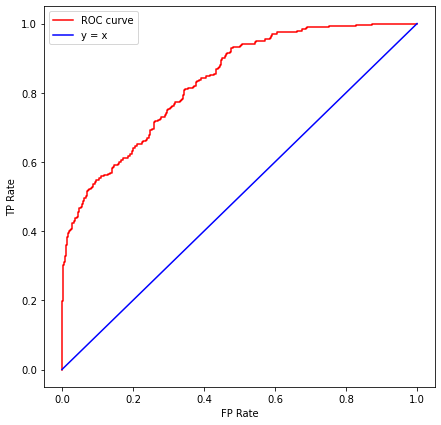

acc_score : 0.824
recall_score : 0.39
precision_score : 0.885
f1_score : 0.541
roc auc value : 0.833


In [15]:
make_roc_curve(y_test, y_pred, y_pred_prob)

### sr = 128

In [33]:
sr = 16000
target_sr = 128

fan_result = load_data_using_multi_process(files = fan_files, sr = sr, target_sr = target_sr)


아래 리스트에서 샘플링 기법을 선택해주세요. 
 ['abs_max(our_custom)', 'kaiser_best', 'kaiser_fast', 'fft', 'scipy', 'polyphase', 'linear', 'zero_order_hold', 'sinc_best', 'sinc_medium', 'sinc_fastest', 'soxr_vhq', 'soxr_hq', 'soxr_mq', 'soxr_lq', 'soxr_hq', 'soxr_qq']
선택한 기법: kaiser_best

멀티 프로세싱을 시작합니다. 현재 코어 30개 사용 중. 
1.다른 사람과 동시에 돌리지 마세요.
2.함부로 진행중에 중단 하지마세요.
--- 걸린시간: 30.90624189376831 ---


In [34]:
np.shape(fan_result)

(16650, 1, 1281)

In [35]:
np.shape(np.squeeze(fan_result))

(16650, 1281)

In [36]:
fan_squeeze_result = np.squeeze(fan_result)
fan_result_df = pd.DataFrame(fan_squeeze_result)
fan_result_df

,0,1,2,3,4,5,6,7,8,9,...,1271,1272,1273,1274,1275,1276,1277,1278,1279,1280
0,0.003102,-0.001882,-0.000215,0.000569,-0.000410,-0.000861,-0.002193,0.003236,-0.000408,0.001996,...,-0.000395,-0.001508,-0.001518,0.004224,0.000745,-0.001488,0.000186,-0.001450,-0.000698,0.0
1,0.003149,-0.001897,0.002058,0.000949,-0.003551,0.000264,-0.000834,0.001493,-0.002736,0.002952,...,0.001530,-0.000995,-0.000729,0.001955,-0.001725,0.001469,-0.002036,-0.003090,0.002795,0.0
2,-0.000473,0.001012,0.000669,0.002899,-0.001716,-0.000099,-0.001435,-0.002847,0.001419,0.000986,...,0.002515,-0.001123,-0.001942,0.000937,-0.002016,0.001160,0.001358,-0.001260,0.000875,0.0
3,-0.001142,0.000320,0.001071,-0.000889,0.000319,0.001102,-0.000633,0.001243,0.000243,-0.001507,...,-0.000643,-0.000506,0.001273,-0.001163,0.001440,-0.000286,-0.001437,0.000649,0.000794,0.0
4,0.000237,0.001088,0.001640,-0.003637,-0.000228,0.004986,-0.004174,0.002659,-0.000065,-0.003278,...,-0.000933,0.002320,-0.000797,-0.000573,0.001242,-0.002405,0.001379,-0.000282,0.000439,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16645,-0.005516,0.002368,-0.000213,-0.003704,0.001123,-0.001960,0.004329,-0.000985,0.000537,-0.000248,...,0.001934,0.000810,-0.000471,-0.000648,-0.003153,0.001893,0.000569,0.002232,-0.000231,1.0
16646,-0.001072,-0.000205,-0.001633,-0.000312,-0.000113,0.001666,0.001182,-0.001520,-0.000975,-0.001170,...,0.002106,0.000086,-0.001887,-0.000299,-0.000658,0.001159,0.001523,-0.000966,-0.001167,1.0
16647,0.002479,0.003295,-0.001288,0.000231,-0.003737,0.001050,0.002877,0.000146,-0.001950,-0.000593,...,0.004536,-0.000060,-0.003601,-0.001437,-0.000410,0.001990,0.002977,-0.002376,-0.000330,1.0
16648,0.000692,-0.005129,0.001818,-0.001113,0.000584,0.002642,-0.001037,-0.001509,-0.001434,0.000807,...,0.000118,-0.000420,0.000103,0.002894,-0.001815,-0.001096,-0.002028,0.000752,0.000715,1.0


In [37]:
data = fan_result_df.iloc[:, :-1]
target = fan_result_df.iloc[:, -1]

In [38]:
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, shuffle=True, stratify=target, random_state=42)

In [39]:
model_lgbm = LGBMClassifier(scale_pos_weight=10)
model_lgbm.fit(X_train, y_train)

y_pred = model_lgbm.predict(X_test)
y_pred_prob = model_lgbm.predict_proba(X_test)

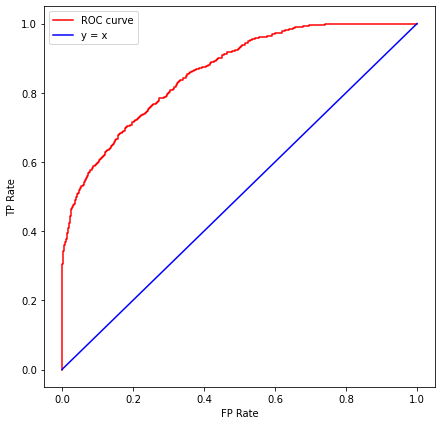

acc_score : 0.664
recall_score : 0.88
precision_score : 0.435
f1_score : 0.582
roc auc value : 0.86


In [40]:
make_roc_curve(y_test, y_pred, y_pred_prob)

### sr = 125

In [41]:
sr = 16000
target_sr = 125

fan_result = load_data_using_multi_process(files = fan_files, sr = sr, target_sr = target_sr)


아래 리스트에서 샘플링 기법을 선택해주세요. 
 ['abs_max(our_custom)', 'kaiser_best', 'kaiser_fast', 'fft', 'scipy', 'polyphase', 'linear', 'zero_order_hold', 'sinc_best', 'sinc_medium', 'sinc_fastest', 'soxr_vhq', 'soxr_hq', 'soxr_mq', 'soxr_lq', 'soxr_hq', 'soxr_qq']
선택한 기법: kaiser_best

멀티 프로세싱을 시작합니다. 현재 코어 30개 사용 중. 
1.다른 사람과 동시에 돌리지 마세요.
2.함부로 진행중에 중단 하지마세요.
--- 걸린시간: 46.50288486480713 ---


In [42]:
np.shape(fan_result)

(16650, 1, 1251)

In [43]:
np.shape(np.squeeze(fan_result))

(16650, 1251)

In [44]:
fan_squeeze_result = np.squeeze(fan_result)
fan_result_df = pd.DataFrame(fan_squeeze_result)
fan_result_df

,0,1,2,3,4,5,6,7,8,9,...,1241,1242,1243,1244,1245,1246,1247,1248,1249,1250
0,0.002942,-0.001876,-0.000023,0.000329,-1.575494e-04,-0.001468,-0.001251,0.002953,-0.000498,0.002274,...,0.000370,-0.001514,-0.001765,0.003427,0.001686,-0.001752,0.000248,-0.001366,-0.000801,0.0
1,0.003022,-0.001927,0.002410,0.000188,-2.970223e-03,-0.000079,-0.000163,0.000669,-0.002182,0.003611,...,0.001365,-0.000372,-0.001237,0.001951,-0.001355,0.000984,-0.001367,-0.003456,0.002804,0.0
2,-0.000339,0.000817,0.000967,0.002550,-1.789996e-03,0.000099,-0.002001,-0.002185,0.001657,0.000899,...,0.001576,0.000250,-0.002685,0.001102,-0.001871,0.000719,0.001625,-0.001306,0.000882,0.0
3,-0.001106,0.000356,0.000996,-0.000932,5.256527e-04,0.000921,-0.000641,0.001578,-0.000539,-0.000869,...,0.000034,-0.001024,0.001389,-0.000997,0.001060,0.000151,-0.001605,0.000631,0.000771,0.0
4,0.000353,0.000983,0.001647,-0.004053,9.308124e-04,0.004010,-0.004253,0.003801,-0.002117,-0.001428,...,-0.001655,0.002244,-0.000264,-0.000927,0.001331,-0.002164,0.000981,-0.000004,0.000277,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16645,-0.005148,0.002342,-0.000623,-0.003176,7.021598e-04,-0.001244,0.004052,-0.001371,0.000938,-0.001040,...,0.002166,0.001001,-0.000375,-0.000377,-0.003211,0.001519,0.000666,0.002204,-0.000254,1.0
16646,-0.001006,-0.000293,-0.001550,-0.000299,-3.132421e-07,0.001825,0.000742,-0.001597,-0.000923,-0.000919,...,0.001974,0.000755,-0.001926,-0.000414,-0.000671,0.000951,0.001591,-0.000811,-0.001244,1.0
16647,0.002390,0.003105,-0.001147,-0.000098,-3.520717e-03,0.001525,0.002762,-0.000569,-0.001671,-0.000589,...,0.003503,0.001747,-0.003978,-0.001372,-0.000818,0.001896,0.002973,-0.002053,-0.000504,1.0
16648,0.000650,-0.004937,0.001861,-0.001281,1.016033e-03,0.002326,-0.001362,-0.001454,-0.001177,0.001115,...,0.000014,-0.000261,-0.000309,0.002866,-0.001249,-0.001307,-0.001925,0.000583,0.000701,1.0


In [45]:
data = fan_result_df.iloc[:, :-1]
target = fan_result_df.iloc[:, -1]

In [46]:
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, shuffle=True, stratify=target, random_state=42)

In [47]:
model_lgbm = LGBMClassifier(scale_pos_weight=10)
model_lgbm.fit(X_train, y_train)

y_pred = model_lgbm.predict(X_test)
y_pred_prob = model_lgbm.predict_proba(X_test)

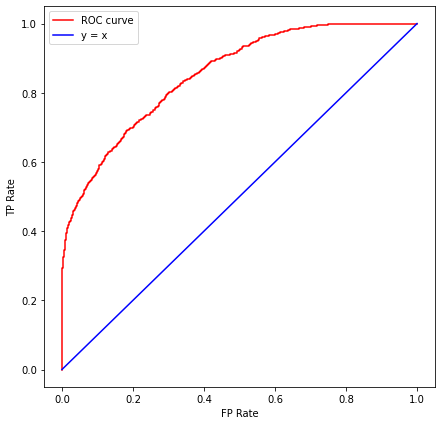

acc_score : 0.675
recall_score : 0.866
precision_score : 0.443
f1_score : 0.586
roc auc value : 0.853


In [48]:
make_roc_curve(y_test, y_pred, y_pred_prob)

### sr = 100

In [49]:
sr = 16000
target_sr = 100

fan_result = load_data_using_multi_process(files = fan_files, sr = sr, target_sr = target_sr)


아래 리스트에서 샘플링 기법을 선택해주세요. 
 ['abs_max(our_custom)', 'kaiser_best', 'kaiser_fast', 'fft', 'scipy', 'polyphase', 'linear', 'zero_order_hold', 'sinc_best', 'sinc_medium', 'sinc_fastest', 'soxr_vhq', 'soxr_hq', 'soxr_mq', 'soxr_lq', 'soxr_hq', 'soxr_qq']
선택한 기법: kaiser_best

멀티 프로세싱을 시작합니다. 현재 코어 30개 사용 중. 
1.다른 사람과 동시에 돌리지 마세요.
2.함부로 진행중에 중단 하지마세요.
--- 걸린시간: 30.66605854034424 ---


In [50]:
np.shape(fan_result)

(16650, 1, 1001)

In [51]:
np.shape(np.squeeze(fan_result))

(16650, 1001)

In [52]:
fan_squeeze_result = np.squeeze(fan_result)
fan_result_df = pd.DataFrame(fan_squeeze_result)
fan_result_df

,0,1,2,3,4,5,6,7,8,9,...,991,992,993,994,995,996,997,998,999,1000
0,0.001790,-0.001232,0.000118,0.000368,-0.002040,0.000584,0.001150,0.001332,-0.001860,-0.000238,...,-0.001221,0.002085,-0.000382,-0.002029,0.001890,0.002016,-0.001643,0.000029,-0.001565,0.0
1,0.001418,-0.000327,0.001805,-0.002264,-0.000904,0.000866,-0.001421,0.001793,0.000992,-0.000800,...,0.000583,-0.002449,0.001623,-0.001533,0.001102,-0.000455,0.000434,-0.002900,0.000529,0.0
2,-0.000582,0.000971,0.001792,-0.000018,-0.000975,-0.001874,-0.000706,0.001919,0.000247,-0.000476,...,0.001051,0.000228,0.000850,-0.000967,-0.000889,-0.000442,0.000551,0.000669,-0.000554,0.0
3,-0.000995,0.000897,-0.000250,0.000245,0.000372,0.000484,0.000299,-0.000432,-0.000241,0.000261,...,0.000324,0.000007,-0.000100,-0.000030,0.000152,0.000448,-0.000225,-0.000900,0.001207,0.0
4,-0.000348,0.002444,-0.002215,-0.000264,0.002361,-0.001484,0.001434,-0.002144,-0.000589,0.000729,...,-0.001796,-0.001084,0.000398,0.000641,-0.000276,-0.000105,-0.000585,0.000173,0.000582,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16645,-0.002110,0.000556,-0.001168,-0.002114,0.001539,0.001114,0.000349,-0.000765,-0.001972,0.001312,...,-0.001931,0.000079,0.001917,0.000547,-0.001098,-0.001595,0.000268,0.002495,-0.000405,1.0
16646,-0.000758,-0.000758,-0.001068,0.000027,0.001655,0.000083,-0.001511,-0.000841,0.002000,0.000795,...,-0.001307,0.000622,0.001880,-0.000683,-0.001301,-0.000137,0.001011,0.000858,-0.001783,1.0
16647,0.001847,0.002136,-0.000929,-0.002296,0.000761,0.002467,-0.001758,-0.000877,-0.000391,0.002359,...,-0.000562,0.001706,0.003084,-0.001098,-0.002972,-0.000241,0.002524,0.000579,-0.001562,1.0
16648,-0.000467,-0.002656,0.000646,-0.000088,0.002185,-0.001543,-0.001473,0.000445,0.000933,0.001410,...,0.001993,-0.002068,0.000144,-0.000466,0.001651,0.000098,-0.002645,0.000103,0.000086,1.0


In [53]:
data = fan_result_df.iloc[:, :-1]
target = fan_result_df.iloc[:, -1]

In [54]:
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, shuffle=True, stratify=target, random_state=42)

In [55]:
model_lgbm = LGBMClassifier(scale_pos_weight=10)
model_lgbm.fit(X_train, y_train)

y_pred = model_lgbm.predict(X_test)
y_pred_prob = model_lgbm.predict_proba(X_test)

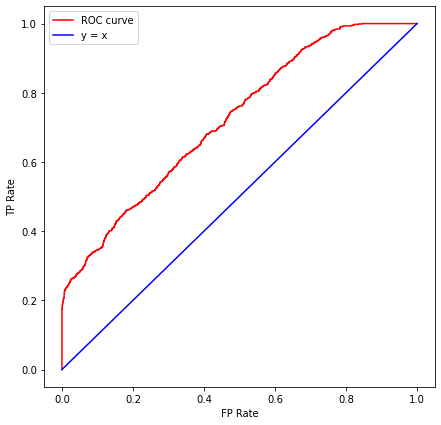

acc_score : 0.538
recall_score : 0.817
precision_score : 0.344
f1_score : 0.484
roc auc value : 0.721


In [56]:
make_roc_curve(y_test, y_pred, y_pred_prob)

### sr = 80

In [57]:
sr = 16000
target_sr = 80

fan_result = load_data_using_multi_process(files = fan_files, sr = sr, target_sr = target_sr)


아래 리스트에서 샘플링 기법을 선택해주세요. 
 ['abs_max(our_custom)', 'kaiser_best', 'kaiser_fast', 'fft', 'scipy', 'polyphase', 'linear', 'zero_order_hold', 'sinc_best', 'sinc_medium', 'sinc_fastest', 'soxr_vhq', 'soxr_hq', 'soxr_mq', 'soxr_lq', 'soxr_hq', 'soxr_qq']
선택한 기법: kaiser_best

멀티 프로세싱을 시작합니다. 현재 코어 30개 사용 중. 
1.다른 사람과 동시에 돌리지 마세요.
2.함부로 진행중에 중단 하지마세요.
--- 걸린시간: 31.93852996826172 ---


In [58]:
np.shape(fan_result)

(16650, 1, 801)

In [59]:
np.shape(np.squeeze(fan_result))

(16650, 801)

In [60]:
fan_squeeze_result = np.squeeze(fan_result)
fan_result_df = pd.DataFrame(fan_squeeze_result)
fan_result_df

,0,1,2,3,4,5,6,7,8,9,...,791,792,793,794,795,796,797,798,799,800
0,0.001041,-0.000762,0.000333,-0.001067,-0.000396,0.002279,-0.001001,-0.000440,-0.000480,-0.000382,...,0.001680,-0.001661,-0.000487,0.001743,-0.002474,0.002080,0.000840,-0.001143,-0.000678,0.0
1,0.000412,0.001137,-0.000482,-0.001567,0.000537,-0.000823,0.002330,-0.001112,-0.001164,0.001165,...,0.000322,0.002136,0.000063,-0.001131,0.000590,-0.000589,0.000988,-0.001996,-0.000466,0.0
2,-0.000571,0.001549,0.000856,-0.000628,-0.002176,0.000409,0.001262,-0.000471,0.002367,-0.001217,...,0.000727,-0.000436,0.000730,0.000560,-0.000225,-0.001268,0.000062,0.000584,0.000026,0.0
3,-0.000357,0.000299,0.000117,0.000204,0.000665,-0.000014,-0.000434,0.000252,-0.000211,0.000381,...,-0.000043,0.000056,0.000201,-0.000005,-0.000150,0.000259,0.000324,-0.000745,0.000483,0.0
4,0.001055,0.000402,-0.001259,0.001220,0.000270,-0.000462,-0.001141,-0.000061,0.000853,0.000881,...,0.000873,0.001329,-0.002239,-0.000139,0.000726,-0.000263,-0.000137,-0.000500,0.000776,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16645,-0.001189,-0.000086,-0.001821,0.000131,0.001747,-0.000207,-0.001464,0.000036,0.001942,-0.001244,...,0.001410,-0.000422,-0.001696,0.001422,0.000990,-0.000951,-0.001696,0.002175,0.000257,1.0
16646,-0.000612,-0.000986,-0.000663,0.001302,0.000366,-0.001947,0.000926,0.001378,-0.001608,-0.000606,...,0.001440,-0.001049,-0.001124,0.001760,0.000112,-0.001448,0.000260,0.001239,-0.001080,1.0
16647,0.001458,0.001888,-0.002534,0.000185,0.001863,-0.001435,-0.001056,0.002063,0.000452,-0.002383,...,-0.000114,-0.002817,-0.000265,0.003136,0.000160,-0.003131,0.000843,0.001978,-0.001218,1.0
16648,-0.000556,-0.001809,0.000438,0.001453,-0.000989,-0.001286,0.001053,0.001087,-0.000995,-0.001667,...,-0.002014,0.001882,0.000832,-0.001410,0.000026,0.001406,-0.000914,-0.001533,0.000388,1.0


In [61]:
data = fan_result_df.iloc[:, :-1]
target = fan_result_df.iloc[:, -1]

In [62]:
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, shuffle=True, stratify=target, random_state=42)

In [63]:
model_lgbm = LGBMClassifier(scale_pos_weight=10)
model_lgbm.fit(X_train, y_train)

y_pred = model_lgbm.predict(X_test)
y_pred_prob = model_lgbm.predict_proba(X_test)

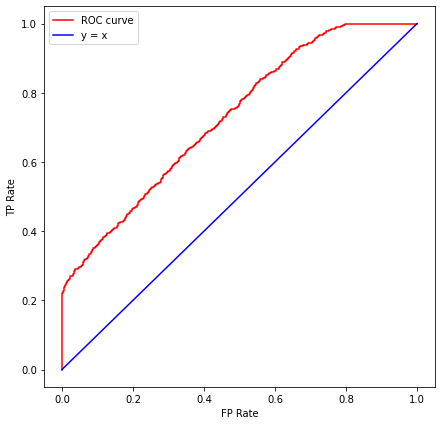

acc_score : 0.547
recall_score : 0.838
precision_score : 0.352
f1_score : 0.496
roc auc value : 0.728


In [64]:
make_roc_curve(y_test, y_pred, y_pred_prob)